# Hands on Machine Learning (ML) for Materials

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/paolodeangelis/AEM/blob/main/2_Hands_on_ML_for_Materials.ipynb)

## Introduction

In this hands-on tutorial, we will explore how to **predict the elastic properties** of crystalline materials using a machine learning approach. Specifically, we will show how to:

1. Load a dataset of structures and their associated elastic tensors.
2. Clean and preprocess the data (removing outliers, normalizing target values, etc.).
3. Represent each structure with a **SOAP** (Smooth Overlap of Atomic Positions) descriptor.
4. Train a simple **neural network** model in **PyTorch** to predict the diagonal components of the elastic tensor ($\mathrm{C}_{11}, \mathrm{C}_{22}, \mathrm{C}_{33}, \mathrm{C}_{44}, \mathrm{C}_{55}, \mathrm{C}_{66}$).
5. Evaluate model performance using metrics such as **mean absolute error** (MAE) and **$R^2$**.
6. [Optional] Compare these predictions with a direct **DFT-based approach** (via MACE) for calculating certain elastic constants.

## Theoretical Context

### Elastic Tensor

A second-order elastic stiffness tensor $\mathbf{C}$ in 3D has 36 components, which are typically reduced to 21 independent components by symmetry. It generalizes **Hooke's law** and **completely** describes the elastic **behavior** of the material.

$$
    \begin{pmatrix}
    \sigma_{11}\\[6pt]
    \sigma_{22}\\[6pt]
    \sigma_{33}\\[6pt]
    \sigma_{23}\\[6pt]
    \sigma_{13}\\[6pt]
    \sigma_{12}
    \end{pmatrix}
    =
    \underbrace{\begin{pmatrix}
    C_{11} & C_{12} & C_{13} & C_{14} & C_{15} & C_{16}\\[6pt]
    C_{21} & C_{22} & C_{23} & C_{24} & C_{25} & C_{26}\\[6pt]
    C_{31} & C_{32} & C_{33} & C_{34} & C_{35} & C_{36}\\[6pt]
    C_{41} & C_{42} & C_{43} & C_{44} & C_{45} & C_{46}\\[6pt]
    C_{51} & C_{52} & C_{53} & C_{54} & C_{55} & C_{56}\\[6pt]
    C_{61} & C_{62} & C_{63} & C_{64} & C_{65} & C_{66}
    \end{pmatrix}}_{\displaystyle \text{(6×6 stiffness matrix)}}
    \begin{pmatrix}
    \varepsilon_{11}\\[6pt]
    \varepsilon_{22}\\[6pt]
    \varepsilon_{33}\\[6pt]
    2\,\varepsilon_{23}\\[6pt]
    2\,\varepsilon_{13}\\[6pt]
    2\,\varepsilon_{12}
    \end{pmatrix}.
$$



Here we focus on the diagonal components:

$$
C_{11}, \quad C_{22}, \quad C_{33}, \quad C_{44}, \quad C_{55}, \quad C_{66}.
$$

In the most common engineering notation, the linear relation between stress $\sigma$ and strain $\varepsilon$ can be written as:

$$
\sigma_{ij} = \sum_{k, l} C_{ijkl} \,\varepsilon_{kl},
$$

where $\sigma_{ij}$ is the stress tensor, $\varepsilon_{kl}$ is the strain tensor, and $C_{ijkl}$ are the elastic stiffness constants.

## [Step 1]: Install library and download data

In [ ]:
%pip install torch torchvision pandas matplotlib numpy pymatgen dscribe scikit-learn tqdm mp-api pandas iterative-stratification mace-torch

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 92.7 MB/s eta 0:00:00
   ━━

In [ ]:
import numpy as np
import pandas as pd
import torch
from ase import Atoms
from dscribe.descriptors import SOAP
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
from pymatgen.core import Composition, Structure
from scipy.stats import zscore
from torch.utils.data import DataLoader, Dataset

ModuleNotFoundError: No module named 'torch'

> **Note**: The following setting must be changed in the assignment.

In [ ]:
N_SAMPLES = 5000  # Number of samples to use
SEED = 42  # Random seed to ensure reproducibility
BATCH_SIZE = 8  # Batch size

np.random.seed(SEED)
torch.manual_seed(SEED)
torch.set_default_dtype(torch.float32)

dowload data

In [ ]:
!wget https://github.com/paolodeangelis/AEM/raw/refs/heads/main/data/elasticity_full_properties.h5

Load data:

In [ ]:
df_full = pd.read_hdf("elasticity_full_properties.h5", key="df")

df_full

## [Step 2]: Data cleaning & Downsampling

**Data Cleaning Steps**:

1. **Drop missing data** in `"Structure"` or `"Elastic Tensor"`.  
2. **Extract diagonal components** \((C_{11}, C_{22}, \ldots, C_{66})\) from the elastic tensor.  
3. **Remove outliers** using the IQR method, filtering extreme values in each diagonal component.  
4. **Shuffle** the remaining dataset randomly.  
5. **Select** only the first `N_SAMPLES` rows for practical training.


In [ ]:
# Drop missing data
df_full = df_full.dropna(subset=["Structure", "Elastic Tensor"])

In [7]:
# Extract targets
tensor_components = ["C11", "C22", "C33", "C44", "C55", "C66"]
tensor_indices = [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]

for i, (r, c) in enumerate(tensor_indices):
    df_full[tensor_components[i]] = df_full["Elastic Tensor"].apply(
        lambda x: np.array(x)[r, c]
    )

In [8]:
# IQR-based outlier removal for each tensor component


def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[
            (df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)
        ]
    return df_clean.reset_index(drop=True)

In [ ]:
df_clean = remove_outliers_iqr(df_full, tensor_components)
print(f"Removed {len(df_full)-len(df_clean)} outliers. Remaining data: {len(df_clean)}")

Downsampling

In [10]:
df_clean_shuffled = df_clean.sample(frac=1, random_state=SEED).reset_index(drop=True)

# Select only first N_SAMPLES
df_final = df_clean_shuffled.iloc[:N_SAMPLES].reset_index(drop=True)
print(f"Final dataset size: {len(df_final)}")

Final dataset size: 5000


## [Step 3]: Data Splitting 

Instead of a purely random split, we perform a **multilabel stratified split** based on the presence or absence of each chemical element in the structures. Here's why:

1. **Element Distribution**: A simple random split may result in some elements being over-represented in either the training or test set (or missing entirely in one of them).  
2. **Balanced Training**: By using a stratified approach, we ensure that each element’s frequency distribution is maintained across both sets, giving the model a more representative range of materials during training and an unbiased evaluation on the test set.  
3. **Improved Robustness**: Preserving distribution across all labels (elements) reduces the risk of skewing the model toward certain compositions and thus generally improves its predictive robustness.


In [ ]:
# Step 1: Get all unique elements
all_elements = sorted(
    {str(el) for s in df_final["Structure"] for el in s.composition.elements}
)
element_to_idx = {el: i for i, el in enumerate(all_elements)}

# Step 2: Build binary matrix (samples × elements)
binary_matrix = np.zeros((len(df_final), len(all_elements)), dtype=int)

for i, s in enumerate(df_final["Structure"]):
    comp = s.composition
    for el in comp:
        binary_matrix[i, element_to_idx[str(el)]] = 1

# Step 3: Stratified multilabel split (preserves element distributions)
sss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
train_idx, test_idx = next(sss.split(df_final, binary_matrix))

print(f"Train size: {len(train_idx)}, Test size: {len(test_idx)}")

NameError: name 'df_final' is not defined

Plot frequency

In [3]:
def get_element_distribution(indices):
    counter = {el: 0 for el in all_elements}
    for s in df_final.iloc[indices]["Structure"]:
        comp = s.composition
        for el in comp:
            counter[str(el)] += comp[el]
    total = sum(counter.values())
    return {el: counter[el] / total for el in counter}


train_dist = get_element_distribution(train_idx)
test_dist = get_element_distribution(test_idx)

# Plot comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
x = np.arange(len(all_elements))
train_vals = [train_dist[el] for el in all_elements]
test_vals = [test_dist[el] for el in all_elements]

plt.bar(x - 0.2, train_vals, width=0.4, label="Train")
plt.bar(x + 0.2, test_vals, width=0.4, label="Test")
plt.xticks(x, all_elements, rotation=90)
plt.ylabel("Normalized Frequency")
plt.title("Element Frequency Distribution: Train vs Test")
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'train_idx' is not defined

### `ElasticSOAPDataset`: On-the-Fly Feature Extraction

The **`ElasticSOAPDataset`** class is a custom **PyTorch** dataset designed to:
1. **Store the raw data** (each row’s `Structure` and corresponding target properties).
2. **Generate SOAP descriptors** for each structure **on the fly**.

Why generate features on the fly?
- **Memory Efficiency**: Storing all SOAP vectors for large datasets can be highly memory-intensive. Creating them on demand avoids holding massive arrays in memory.  
- **Flexibility**: If you wish to alter descriptor parameters (e.g., `r_cut`, `n_max`, `l_max`), the dataset can dynamically re-calculate descriptors without needing to rewrite the entire feature set.  
- **Seamless Integration**: PyTorch’s **`DataLoader`** works seamlessly with datasets that compute features when needed (in each training batch), supporting parallel or background loading if desired.

Overall, this approach keeps the pipeline **modular**, **efficient**, and **easy to maintain**.


In [ ]:
class ElasticSOAPDataset(Dataset):
    def __init__(self, dataframe, soap_params):
        self.df = dataframe
        self.soap = SOAP(**soap_params)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        structure = self.df.loc[idx, "Structure"]

        ase_structure = Atoms(
            symbols=[str(s.specie) for s in structure],
            positions=structure.cart_coords,
            cell=structure.lattice.matrix,
            pbc=True,
        )

        feature = self.soap.create(ase_structure, n_jobs=1).flatten()

        target = self.df.loc[
            idx, ["C11", "C22", "C33", "C44", "C55", "C66"]
        ].values.astype(float)

        return torch.tensor(feature, dtype=torch.float32), torch.tensor(
            target, dtype=torch.float32
        )

In [ ]:
# from sklearn.model_selection import train_test_split

# indices = np.arange(len(df_final))
# train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)


species = list({str(el) for s in df_final["Structure"] for el in s.species})

soap_params = {
    "species": species,
    "periodic": True,
    "r_cut": 6.0,
    "n_max": 5,
    "l_max": 2,
    "average": "inner",
}

train_dataset = ElasticSOAPDataset(
    df_final.iloc[train_idx].reset_index(drop=True), soap_params
)
test_dataset = ElasticSOAPDataset(
    df_final.iloc[test_idx].reset_index(drop=True), soap_params
)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

Plot Periodic Table with element couting

INFO: df_final or train_idx not defined. Using dummy data.


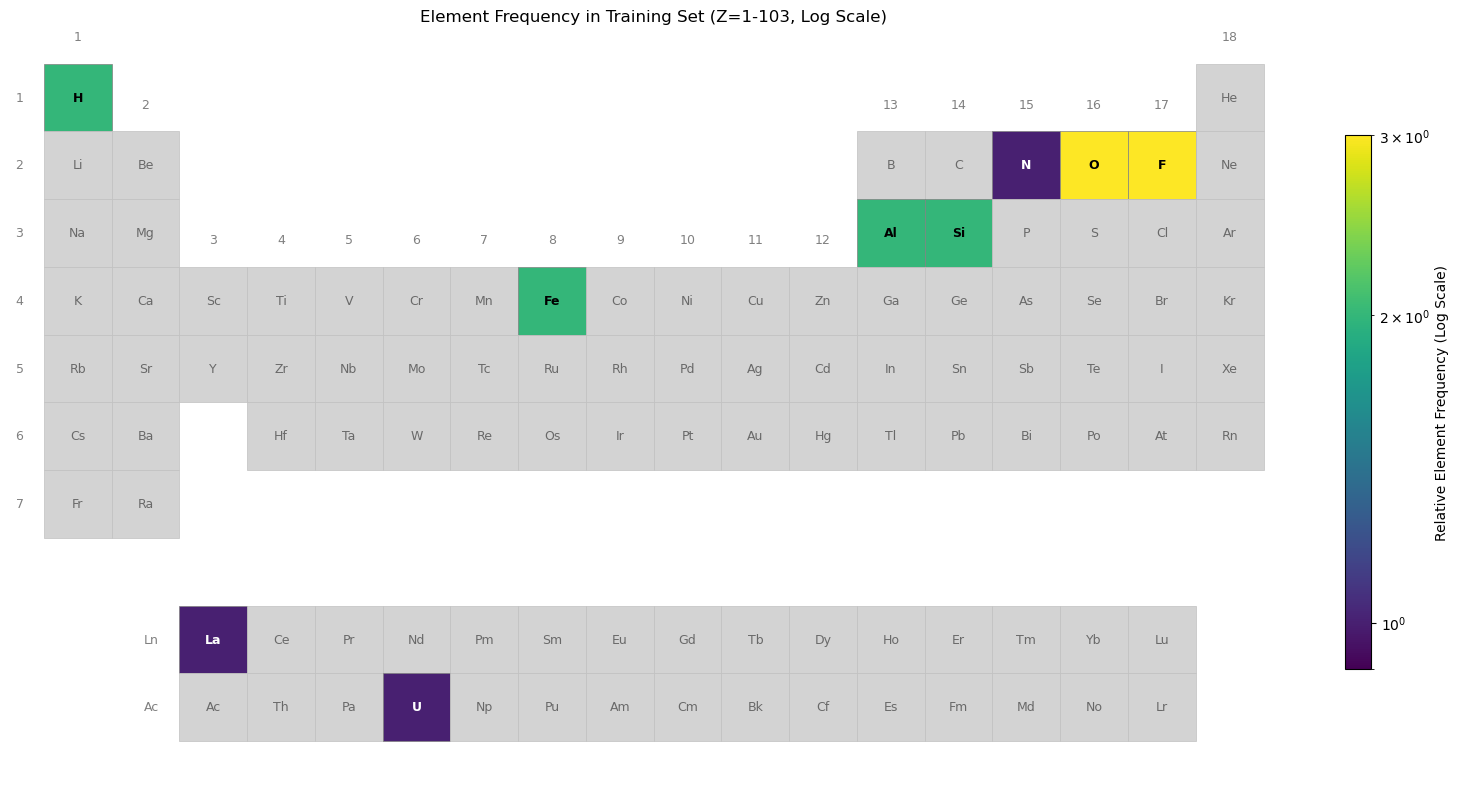

In [ ]:
import matplotlib.colors as mcolors  # Import colors for LogNorm and explicit colors
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pymatgen.core import Composition, Lattice, Structure
from pymatgen.core.periodic_table import Element, get_el_sp

# 1. Count element frequencies
element_counts = {}
try:
    for s in df_final.iloc[train_idx]["Structure"]:
        comp = s.composition
        for el_sym in comp.keys():  # Use element symbol object from composition
            element = Element(el_sym.symbol)  # Get pymatgen Element from symbol string
            element_counts[element] = element_counts.get(element, 0) + comp[el_sym]
except Exception as e:
    print(f"Error processing structures: {e}. Check df_final format.")
    element_counts = {Element("H"): 1, Element("O"): 2}  # Minimal fallback data

# 2. Normalize frequencies
total_atoms = sum(element_counts.values())
element_freq = {}
if total_atoms > 0:
    # element_freq = {el: count / total_atoms for el, count in element_counts.items()}
    element_freq = {el: count for el, count in element_counts.items()}
else:
    print("Warning: No atoms found in the dataset.")

# --- Plotting Setup ---
MAX_Z = 103  # Define the maximum atomic number to display (e.g., up to Lr)
MISSING_FACE_COLOR = "lightgrey"
MISSING_TEXT_COLOR = "dimgray"
PRESENT_EDGE_COLOR = "gray"

# 3. Prepare Colormap and Normalization for PRESENT elements
cmap = plt.get_cmap("viridis")
norm = None
min_freq = 1.0
max_freq = 0.0

if element_freq:
    present_frequencies = [freq for freq in element_freq.values() if freq > 0]
    if present_frequencies:
        min_freq = min(present_frequencies)
        max_freq = max(present_frequencies)
        # Use LogNorm - ensure vmin is positive and slightly less than actual min
        norm = mcolors.LogNorm(
            vmin=min_freq * 0.9 if min_freq > 0 else 1e-9, vmax=max_freq
        )
    else:
        print("Warning: All element frequencies are zero.")
else:
    print("Warning: No element frequencies calculated.")


# 4. Helper function for element coordinates (includes Ln/Ac placement)
def get_element_display_coords(element: Element):
    """Calculates display row and group for standard periodic table layout."""
    row = element.row
    group = element.group

    if 57 <= element.Z <= 71:  # Lanthanides (La-Lu) -> display row 9
        display_row = 9
        display_group = 3 + (
            element.Z - 57
        )  # Place sequentially starting in group 3 column space
    elif 89 <= element.Z <= 103:  # Actinides (Ac-Lr) -> display row 10
        display_row = 10
        display_group = 3 + (
            element.Z - 89
        )  # Place sequentially starting in group 3 column space
    else:
        display_row = row
        display_group = group

    return display_row, display_group


# 5. Plotting
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_aspect("equal")

# Determine max plot dimensions based on MAX_Z elements' positions
max_disp_row = 0
max_disp_group = 0
all_coords = {}
for Z in range(1, MAX_Z + 1):
    try:
        element = Element.from_Z(Z)
        disp_r, disp_g = get_element_display_coords(element)
        all_coords[Z] = (disp_r, disp_g, element.symbol)
        max_disp_row = max(max_disp_row, disp_r)
        max_disp_group = max(max_disp_group, disp_g)
    except ValueError:
        print(f"Warning: Could not get Element object for Z={Z}")
        continue  # Skip if pymatgen doesn't know the element

ax.set_xlim(0, max_disp_group + 1)
ax.set_ylim(max_disp_row + 1, 0)  # Set limits *before* inverting y-axis
# ax.invert_yaxis()  # Ensure row 1 is at the top


# --- Iterate through ALL elements up to MAX_Z ---
for Z in range(1, MAX_Z + 1):
    if Z not in all_coords:
        continue  # Skip if coordinates weren't determined

    disp_r, disp_g, symbol = all_coords[Z]
    element_obj = Element(symbol)  # Get Element object for checking frequency dict

    face_color = MISSING_FACE_COLOR
    text_color = MISSING_TEXT_COLOR
    edge_color = "silver"  # Lighter edge for missing elements
    label = symbol  # Default label is just the symbol

    # Check if this element is in our frequency data
    if element_obj in element_freq and element_freq[element_obj] > 0 and norm:
        freq_val = element_freq[element_obj]
        face_color = cmap(norm(freq_val))
        edge_color = PRESENT_EDGE_COLOR

        # Determine text color based on background luminance
        luminance = (
            0.2126 * face_color[0] + 0.7152 * face_color[1] + 0.0722 * face_color[2]
        )
        text_color = "white" if luminance < 0.5 else "black"
        # Optional: add frequency to label for present elements
        # label = f"{symbol}\n{freq_val:.2e}" # Show frequency in scientific notation

    # Draw the rectangle (element cell)
    rect = patches.Rectangle(
        (disp_g - 0.5, disp_r - 0.5),
        1,
        1,
        linewidth=0.5,
        edgecolor=edge_color,
        facecolor=face_color,
    )
    ax.add_patch(rect)

    # Add element symbol (or label)
    ax.text(
        disp_g,
        disp_r,
        label,
        ha="center",
        va="center",
        fontsize=9,
        weight="bold" if face_color != MISSING_FACE_COLOR else "normal",
        color=text_color,
    )

# --- Add Group/Row Labels (Optional but Recommended) ---
# Group numbers (columns 1-18)
for i in range(1, max_disp_group + 1):
    # Find the minimum display row for any element in this group (main block or Ln/Ac)
    min_row_in_group = float("inf")
    has_element_in_group = False
    for r, g, _ in all_coords.values():
        if g == i:
            min_row_in_group = min(min_row_in_group, r)
            has_element_in_group = True

    if has_element_in_group:
        # Place label above the highest element in that column
        ax.text(
            i,
            min_row_in_group - 0.8,
            str(i),
            ha="center",
            va="bottom",
            fontsize=9,
            color="gray",
        )

# Row numbers (periods 1-7, plus Ln/Ac labels)
for i in range(1, max_disp_row + 1):
    # Find the minimum display group for any element in this row
    min_group_in_row = float("inf")
    has_element_in_row = False
    label = str(i)  # Default label is row number
    if i == 9:
        label = "Ln"
    if i == 10:
        label = "Ac"

    for r, g, _ in all_coords.values():
        if r == i:
            min_group_in_row = min(min_group_in_row, g)
            has_element_in_row = True

    if has_element_in_row:
        # Place label left of the first element in that row
        ax.text(
            min_group_in_row - 0.8,
            i,
            label,
            ha="right",
            va="center",
            fontsize=9,
            color="gray",
        )


# --- Final Aesthetics ---
# ax.invert_yaxis() # Ensure row 1 is at the top *AFTER* setting limits and plotting
plt.title(f"Element Frequency in Training Set (Z=1-{MAX_Z}, Log Scale)")
plt.axis("off")  # Turn off the outer axis border and ticks

# Add color bar *only* if there were present elements to normalize
if norm:
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Required empty array
    cbar = plt.colorbar(sm, ax=ax, shrink=0.7, aspect=20, pad=0.03)
    cbar.set_label("Relative Element Frequency (Log Scale)")
else:
    # Optional: Add a note if no frequency data is shown
    ax.text(
        0.5,
        -0.05,
        "No frequency data to display.",
        transform=ax.transAxes,
        ha="center",
        fontsize=10,
        color="red",
    )


plt.tight_layout()
plt.show()

In [ ]:
import torch.nn as nn


class ElasticSOAPNet(nn.Module):
    def __init__(self, input_dim, output_dim=6):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(16, output_dim),
        )

    def forward(self, x):
        return self.fc(x)

ModuleNotFoundError: No module named 'torch'

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [19]:
sample_feature, _ = train_dataset[0]
model = ElasticSOAPNet(input_dim=sample_feature.shape[0]).to(device)

criterion = nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)

In [20]:
from tqdm import tqdm

epochs = 5
model.train()

train_losses = []
val_losses = []

for epoch in range(epochs):
    epoch_loss = 0
    progress = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", unit=" batch")

    for i, (features, targets) in enumerate(progress):
        features, targets = features.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        avg_epoch_loss = epoch_loss / (i + 1)

        progress.set_postfix(
            batch_loss=f"{loss.item():.4f}", epoch_avg_loss=f"{avg_epoch_loss:.4f}"
        )

    avg_epoch_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_epoch_loss)

    # Validation loss computation
    model.eval()
    val_epoch_loss = 0
    with torch.no_grad():
        for val_features, val_targets in test_loader:
            val_features, val_targets = val_features.to(device), val_targets.to(device)
            val_outputs = model(val_features)
            val_loss = criterion(val_outputs, val_targets)
            val_epoch_loss += val_loss.item()

    val_epoch_loss /= len(test_loader)
    val_losses.append(val_epoch_loss)

    print(
        f"Epoch [{epoch+1}/{epochs}] Train Loss: {avg_epoch_loss:.4f} | Val Loss: {val_epoch_loss:.4f}"
    )

    model.train()

Epoch 1/5: 100%|██████████| 250/250 [01:58<00:00,  2.11 batch/s, batch_loss=6349.9399, epoch_avg_loss=10219.9225]


Epoch [1/5] Train Loss: 10219.9225 | Val Loss: 4045.5703


Epoch 2/5: 100%|██████████| 250/250 [01:57<00:00,  2.13 batch/s, batch_loss=2299.1931, epoch_avg_loss=5798.3862]


Epoch [2/5] Train Loss: 5798.3862 | Val Loss: 3442.5355


Epoch 3/5: 100%|██████████| 250/250 [02:13<00:00,  1.87 batch/s, batch_loss=5766.2139, epoch_avg_loss=4835.9492]


Epoch [3/5] Train Loss: 4835.9492 | Val Loss: 2576.4857


Epoch 4/5: 100%|██████████| 250/250 [02:14<00:00,  1.86 batch/s, batch_loss=3630.5237, epoch_avg_loss=4499.7432]


Epoch [4/5] Train Loss: 4499.7432 | Val Loss: 2708.5735


Epoch 5/5: 100%|██████████| 250/250 [02:09<00:00,  1.93 batch/s, batch_loss=2526.3093, epoch_avg_loss=4175.4197]


Epoch [5/5] Train Loss: 4175.4197 | Val Loss: 2626.9544


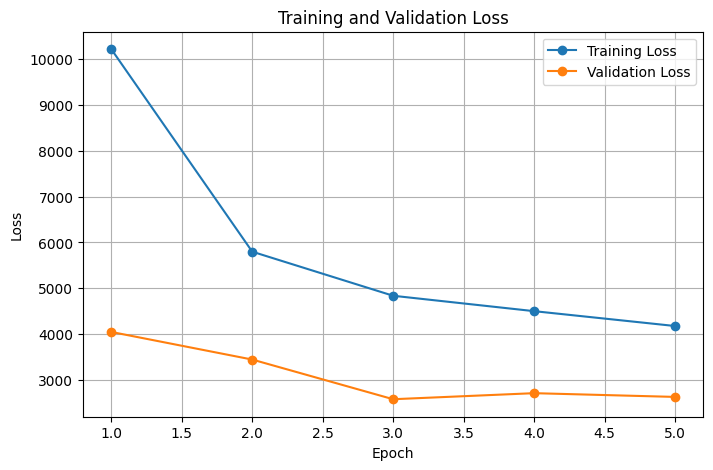

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss", marker="o")
plt.plot(range(1, epochs + 1), val_losses, label="Validation Loss", marker="o")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score


def get_predictions(model, loader, device):
    model.eval()
    preds, actuals = [], []
    with torch.no_grad():
        for features, targets in tqdm(loader, desc="Evaluating"):
            features = features.to(device)
            outputs = model(features).cpu().numpy()
            preds.append(outputs)
            actuals.append(targets.numpy())
    return np.vstack(actuals), np.vstack(preds)


# Predictions on Train and Test datasets
train_actuals, train_preds = get_predictions(model, train_loader, device)
test_actuals, test_preds = get_predictions(model, test_loader, device)

Evaluating: 100%|██████████| 63/63 [00:05<00:00, 12.50it/s]


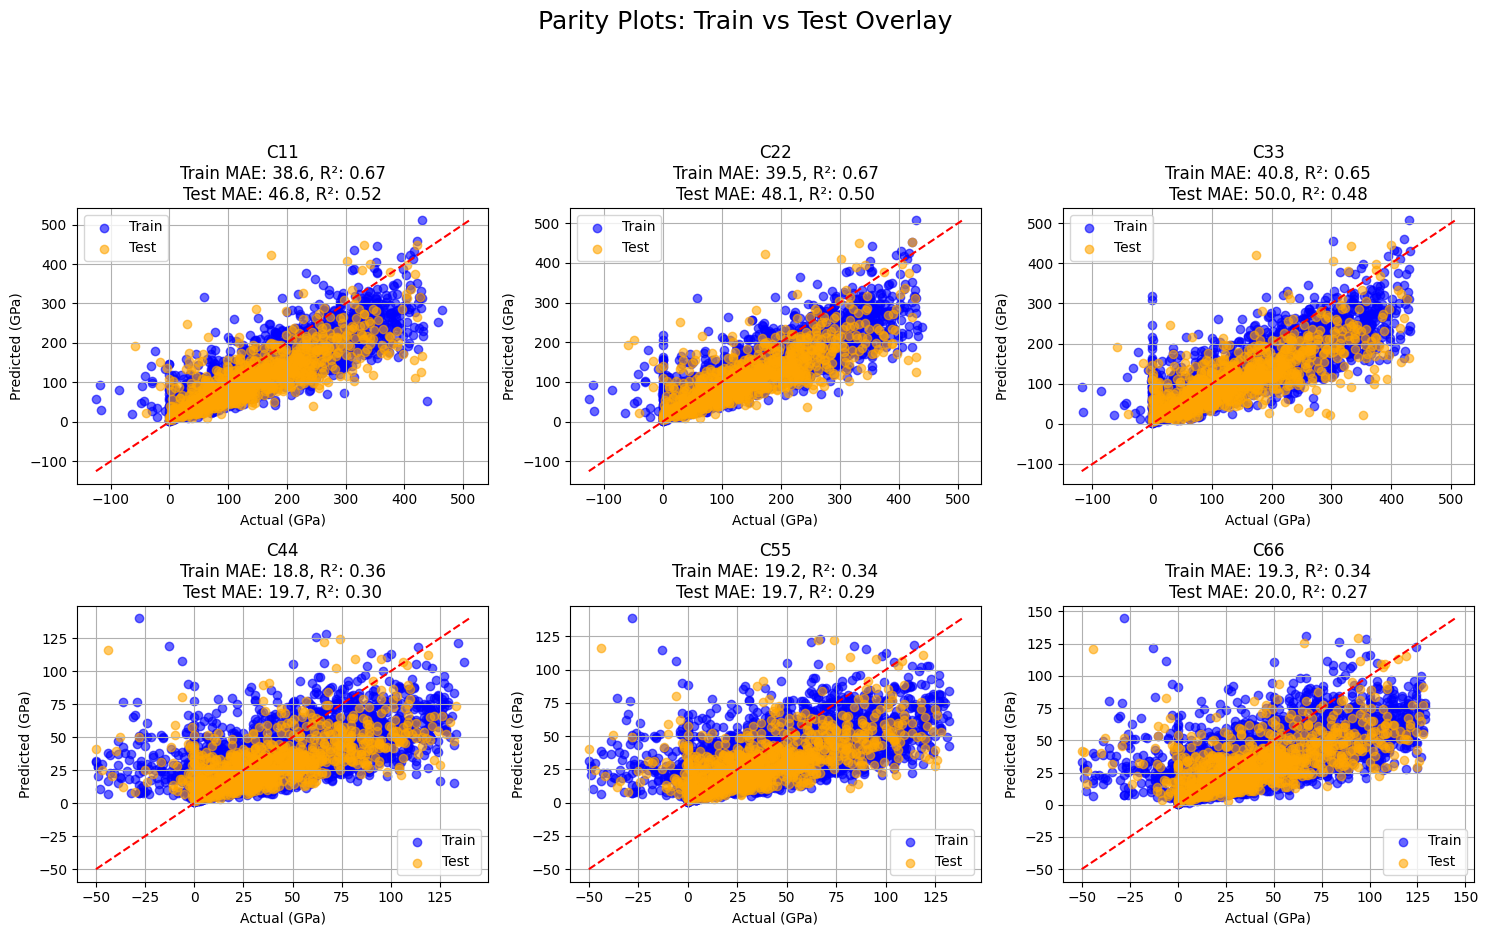

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

tensor_components = ["C11", "C22", "C33", "C44", "C55", "C66"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Parity Plots: Train vs Test Overlay", fontsize=18)

for i, comp in enumerate(tensor_components):
    # Train metrics
    train_mae = mean_absolute_error(train_actuals[:, i], train_preds[:, i])
    train_r2 = r2_score(train_actuals[:, i], train_preds[:, i])

    # Test metrics
    test_mae = mean_absolute_error(test_actuals[:, i], test_preds[:, i])
    test_r2 = r2_score(test_actuals[:, i], test_preds[:, i])

    ax = axes.reshape(-1)[i]
    ax.scatter(
        train_actuals[:, i], train_preds[:, i], alpha=0.6, label="Train", color="blue"
    )
    ax.scatter(
        test_actuals[:, i], test_preds[:, i], alpha=0.6, label="Test", color="orange"
    )

    # Identity line
    all_vals = np.concatenate(
        [train_actuals[:, i], train_preds[:, i], test_actuals[:, i], test_preds[:, i]]
    )
    min_val, max_val = all_vals.min(), all_vals.max()
    ax.plot([min_val, max_val], [min_val, max_val], "r--")

    ax.set_title(
        f"{comp}\nTrain MAE: {train_mae:.1f}, R²: {train_r2:.2f}\nTest MAE: {test_mae:.1f}, R²: {test_r2:.2f}"
    )
    ax.set_xlabel("Actual (GPa)")
    ax.set_ylabel("Predicted (GPa)")
    ax.grid(True)
    ax.legend()

plt.tight_layout(rect=[0, 0.05, 1, 0.9])
plt.show()

In [91]:
axes

array([[<Axes: title={'center': 'C11\nTrain MAE: 29.3, R²: 0.82\nTest MAE: 42.7, R²: 0.63'}, xlabel='Actual', ylabel='Predicted'>,
        <Axes: title={'center': 'C22\nTrain MAE: 31.2, R²: 0.81\nTest MAE: 44.9, R²: 0.60'}, xlabel='Actual', ylabel='Predicted'>,
        <Axes: title={'center': 'C33\nTrain MAE: 32.3, R²: 0.78\nTest MAE: 46.2, R²: 0.58'}, xlabel='Actual', ylabel='Predicted'>],
       [<Axes: title={'center': 'C12\nTrain MAE: 17.1, R²: 0.72\nTest MAE: 19.7, R²: 0.66'}, xlabel='Actual', ylabel='Predicted'>,
        <Axes: title={'center': 'C13\nTrain MAE: 15.9, R²: 0.77\nTest MAE: 19.2, R²: 0.67'}, xlabel='Actual', ylabel='Predicted'>,
        <Axes: title={'center': 'C23\nTrain MAE: 16.6, R²: 0.75\nTest MAE: 19.5, R²: 0.66'}, xlabel='Actual', ylabel='Predicted'>]],
      dtype=object)

In [27]:
import numpy as np
import torch
from ase.io import read
from dscribe.descriptors import SOAP

# === Load the structure ===
atoms = read("Si.cif")

# === Recreate the SOAP descriptor ===
# Assumes soap_params is already defined as before
soap = SOAP(**soap_params)

# === Create descriptor for the structure ===
feature = soap.create(atoms, n_jobs=-1).flatten()
feature_tensor = (
    torch.tensor(feature, dtype=torch.float32).unsqueeze(0).to(device)
)  # batch size = 1
del feature

# === Load the trained model ===
# model.eval()

# === Predict elastic properties ===
with torch.no_grad():
    prediction = model(feature_tensor).cpu().numpy().flatten()

# === Output ===
tensor_components = ["C11", "C22", "C33", "C44", "C55", "C66"]
print("Predicted elastic tensor components (GPa):")
for comp, value in zip(tensor_components, prediction):
    print(f"{comp}: {value:.2f}")
del feature_tensor

Predicted elastic tensor components (GPa):
C11: 119.20
C22: 119.08
C33: 119.86
C44: 33.11
C55: 33.15
C66: 33.96


In [29]:
import copy

import matplotlib.pyplot as plt
import numpy as np
from ase import Atoms
from ase.io import read
from ase.units import GPa
from mace.calculators import MACECalculator

/usr/local/lib/python3.11/dist-packages/e3nn/o3/_wigner.py:10: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  _Jd, _W3j_flat, _W3j_indices = torch.load(os.path.join(os.path.dirname(__file__), 'constants.pt'))


cuequivariance or cuequivariance_torch is not available. Cuequivariance acceleration will be disabled.


In [30]:
def apply_strain(atoms: Atoms, strain_tensor):
    atoms = atoms.copy()
    cell = atoms.get_cell()
    strain_matrix = np.eye(3) + strain_tensor
    atoms.set_cell(np.dot(strain_matrix, cell), scale_atoms=True)
    return atoms


def compute_elastic_constant(strain_energies, strains, volume):
    # Fit E = 0.5 * C * strain^2 → C = 2 * dE/d(strain^2)
    coeffs = np.polyfit(strains**2, strain_energies, 1)
    return (2 * coeffs[0]) / volume / GPa  # in GPa

/usr/local/lib/python3.11/dist-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


No dtype selected, switching to float64 to match model dtype.


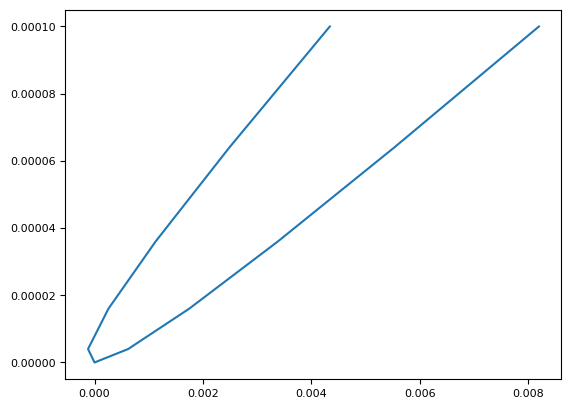

C11: 124.49 GPa


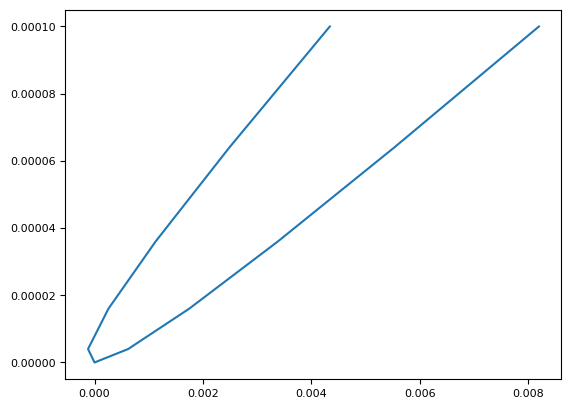

C22: 124.49 GPa


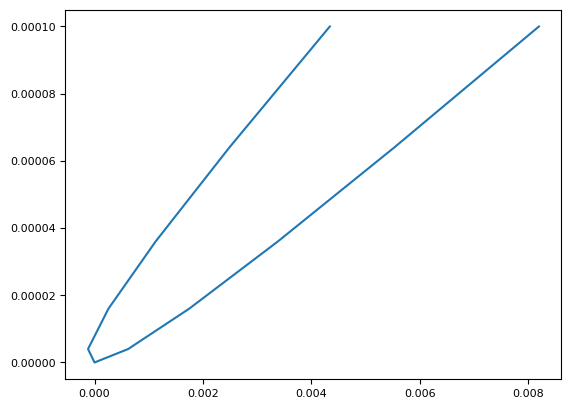

C33: 124.49 GPa


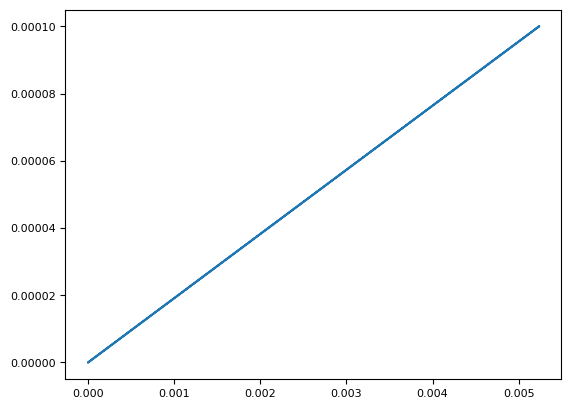

C44: 103.98 GPa


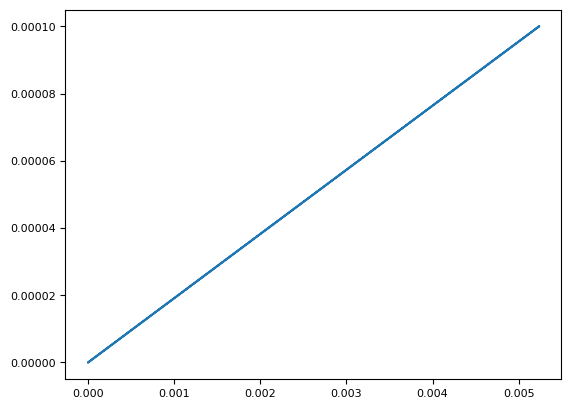

C55: 103.98 GPa


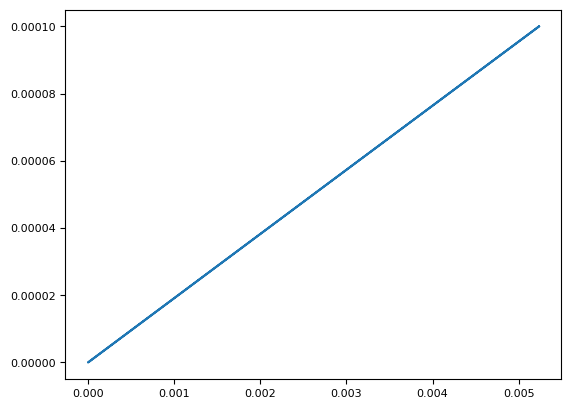

C66: 103.98 GPa


In [38]:
# Load structure
atoms_ref = read("Si.cif")
volume = atoms_ref.get_volume()

# Attach MACE-MP0 calculator
calculator = MACECalculator(
    model_path="MACE-matpes-r2scan-omat-ft.model", device=device.type
)
atoms_ref.calc = calculator

# Small strains to apply
strain_values = np.linspace(-0.01, 0.01, 11)

# Tensor components to compute
component_labels = ["C11", "C22", "C33", "C44", "C55", "C66"]
strain_tensors = {
    "C11": lambda e: np.array([[e, 0, 0], [0, 0, 0], [0, 0, 0]]),
    "C22": lambda e: np.array([[0, 0, 0], [0, e, 0], [0, 0, 0]]),
    "C33": lambda e: np.array([[0, 0, 0], [0, 0, 0], [0, 0, e]]),
    "C44": lambda e: np.array([[0, e / 2, 0], [e / 2, 0, 0], [0, 0, 0]]),
    "C55": lambda e: np.array([[0, 0, e / 2], [0, 0, 0], [e / 2, 0, 0]]),
    "C66": lambda e: np.array([[0, 0, 0], [0, 0, e / 2], [0, e / 2, 0]]),
}

elastic_constants = {}
for label in component_labels:
    energies = []
    for strain in strain_values:
        atoms_def = apply_strain(atoms_ref, strain_tensors[label](strain))
        atoms_def.calc = calculator
        energy = atoms_def.get_potential_energy()
        energies.append(energy)
    energies = np.array(energies)
    strains = np.array(strain_values)
    dE = energies - energies[strains == 0][0]
    Cij = compute_elastic_constant(dE, strains, volume)
    plt.plot(dE, strains**2)
    plt.show()
    elastic_constants[label] = Cij
    print(f"{label}: {Cij:.2f} GPa")

array([0.00523493, 0.00130722, 0.        , 0.00130722, 0.00523493])

In [70]:
compute_elastic_constant(dE, strains, volume)

np.float64(0.00405153147111574)

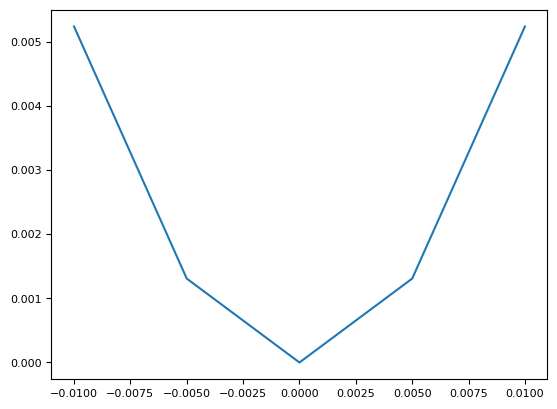

In [32]:
plt.plot(strains, dE)

In [75]:
coeffs = np.polyfit(strains**2, dE, 1)

In [76]:
coeffs

array([ 5.23579614e+01, -1.03868506e-06])

In [77]:
%pip install elastic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.0/627.0 kB 11.8 MB/s eta 0:00:00


In [82]:
from elastic import (
    BMEOS,
    get_BM_EOS,
    get_elastic_tensor,
    get_elementary_deformations,
    get_pressure,
    get_strain,
    scan_volumes,
)
from parcalc import ParCalculate

# Load structure
atoms_ref = read("Si.cif")
volume = atoms_ref.get_volume()

# Attach MACE-MP0 calculator
calculator = MACECalculator(
    model_path="MACE-matpes-r2scan-omat-ft.model", device=device.type
)
atoms_ref.calc = calculator

# Create elementary deformations
systems = get_elementary_deformations(atoms_ref, n=5, d=0.33)

# Run the stress calculations on deformed cells
res = [s.get_potential_energy() for s in systems]

# Elastic tensor by internal routine
Cij, Bij = get_elastic_tensor(atoms_ref, systems=systems)
print("Cij (GPa):", Cij / GPa)

/usr/local/lib/python3.11/dist-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


No dtype selected, switching to float64 to match model dtype.
Cij (GPa): [124.06415286  55.41285991 103.75624432]


In [87]:
Cij

np.float64(104.00159433458276)

In [88]:
Bij

(array([0.77549241, 0.34471501, 0.64874041]),
 np.float64(0.00015723481743481918),
 3,
 array([0.00737902, 0.00521776, 0.00468873]))

In [89]:
help(get_elastic_tensor)

Help on function get_elastic_tensor in module elastic.elastic:

get_elastic_tensor(cryst, systems)
    Calculate elastic tensor of the crystal.
    
    The elastic tensor is calculated from the stress-strain relation
    and derived by fitting this relation to the set of linear equations
    build from the symmetry of the crystal and strains and stresses
    of the set of elementary deformations of the unit cell.
    
    It is assumed that the crystal is converged and optimized
    under intended pressure/stress. The geometry and stress on the
    cryst is taken as the reference point. No additional optimization
    will be run. Structures in cryst and systems list must have calculated
    stresses. The function returns tuple of :math:`C_{ij}` elastic tensor,
    raw Birch coefficients :math:`B_{ij}` and fitting results: residuals,
    solution rank, singular values returned by numpy.linalg.lstsq.
    
    :param cryst: Atoms object, basic structure
    :param systems: list of Atoms 

In [90]:
help(get_elementary_deformations)

Help on function get_elementary_deformations in module elastic.elastic:

get_elementary_deformations(cryst, n=5, d=2)
    Generate elementary deformations for elastic tensor calculation.
    
    The deformations are created based on the symmetry of the crystal and
    are limited to the non-equivalet axes of the crystal.
    
    :param cryst: Atoms object, basic structure
    :param n: integer, number of deformations per non-equivalent axis
    :param d: float, size of the maximum deformation in percent and degrees
    
    :returns: list of deformed structures

